# Cereal  Prices Analysis and Prediction

**What will you obtain from this project ?**
* Data preprocessing (Numpy,Pandas)
* Data visualization(Seaborn,Matplotlib)
* Data prediction(sklearn.metrics,model_selection)
* Feature Engineering

**Introduction**
* The Cereals are one of the most important resources for all living things
* Grain and cereal products are significant foods for health because they contain vitamins, minerals, carbohydrates (starch, fiber) and other nutrients, and their carbohydrate content is high.
* Corn and Rice can be grown in warm places.In addition,Wheat can be grown in cool places.

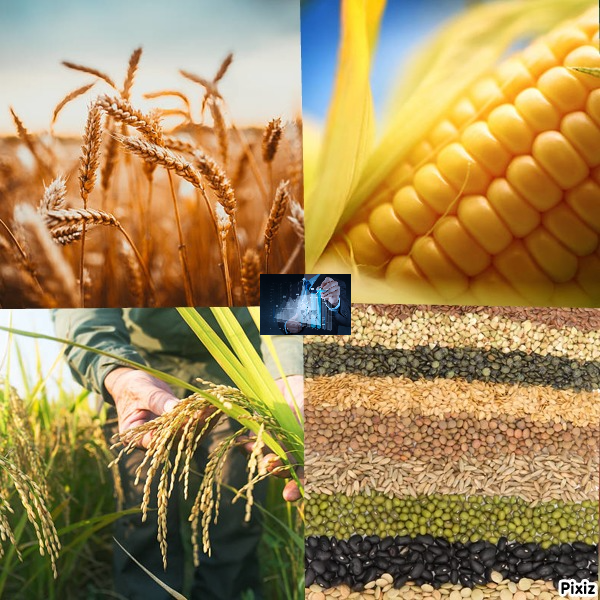

## Table of contents

1. [General Info](#1)
2. [Data Content](#2)
3. [Python Libraries](#3)
4. [First Look at Dataset](#4)
5. [Data Types](#5)
6. [Wheat Annual Price Graph](#6)
7. [Corn Annual Price Graph](#7)
8. [Rice Annual Price Graph](#8)
9. [Outliers](#9)
10. [Numerical variables](#10)
11. [Outlier analysis for numerical variables](#11)
12. [Correlation Analysis](#12)
13. [Data Summary](#13)
14. [Encoding](#14)
15. [Standardization](#15)
16. [Prediction without feature engineering](#16)
17. [Prediction with feature engineering](#17)
18. [Result](#18)

<a id="1"></a>
### General Info

This project has made cereal prices analysis,visualization and forecasting.Cereal prices's changing has supported with graphics.

<a id='2'></a>
### Data Content
* **Year :** A year starting from 1992 ending with 2022
* **Month :** A month of the year
* **Price_wheat_ton :** Wheat price per ton in the definite month and year
* **Price_wheat_ton_infl :** Modern price per ton of wheat
* **Price_rice_ton :** Price price per ton in the definite month and year
* **Price_rice_ton_infl :** Modern rice per ton of wheat
* **Price_corn_ton** : Corn price per ton in the definite month and year
* **Price_corn_ton_inf :** Modern price per ton of corn
* **Inflation_rate :** İnflation rate constantly changes  according to prices.


<a id='3'></a>
### Python Libraries

In this section,we will import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

warnings.filterwarnings("ignore")

<a id='4'></a>
### First Look at Dataset

In [2]:
cereal_df = pd.read_csv("kaggle/input/cereal-prices-changes/rice_wheat_corn_prices.csv")
df = cereal_df.copy()
df.drop_duplicates()
df.head(30)

,Year,Month,Price_wheat_ton,Price_rice_ton,Price_corn_ton,Inflation_rate,Price_wheat_ton_infl,Price_rice_ton_infl,Price_corn_ton_infl
0,1992,Feb,170.12,278.25,113.62,89.59,322.53,527.53,215.41
1,1992,Mar,161.44,277.20,117.00,89.59,306.07,525.54,221.82
2,1992,Apr,153.07,278.00,108.52,89.59,290.21,527.06,205.74
3,1992,May,139.72,274.00,109.64,89.59,264.90,519.48,207.87
4,1992,Jun,140.36,268.80,110.90,89.59,266.11,509.62,210.26
5,1992,Jul,129.93,278.50,102.75,89.59,246.33,528.01,194.80
6,1992,Aug,118.80,270.80,96.96,89.59,225.23,513.41,183.83
7,1992,Sep,131.47,257.00,98.05,89.59,249.25,487.25,185.89
8,1992,Oct,137.42,250.00,95.11,89.59,260.53,473.98,180.32
9,1992,Nov,145.84,252.60,94.48,89.59,276.50,478.90,179.12


<a id='5'></a>
### Data Types

*We are examining to had what type of data*

In [3]:
df.dtypes

Year                      int64
Month                    object
Price_wheat_ton         float64
Price_rice_ton          float64
Price_corn_ton          float64
Inflation_rate          float64
Price_wheat_ton_infl    float64
Price_rice_ton_infl     float64
Price_corn_ton_infl     float64
dtype: object

I've made small letter all of column names if you dont want,you can remove below code

In [4]:
df.columns = df.columns.str.lower()
df.dtypes

year                      int64
month                    object
price_wheat_ton         float64
price_rice_ton          float64
price_corn_ton          float64
inflation_rate          float64
price_wheat_ton_infl    float64
price_rice_ton_infl     float64
price_corn_ton_infl     float64
dtype: object

In [5]:
def showlineplot(style, x, y, dataframe, alhp,rot,color, xlabel, ylabel, title):
    sns.set_style(style)
    sns.lineplot(x=x,
                 y=y,
                 data=dataframe,
                 alpha=alhp,
                 color=color
                 )
    plt.xticks(rotation=rot)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

<a id='6'></a>
### Wheat Annual Price Graph

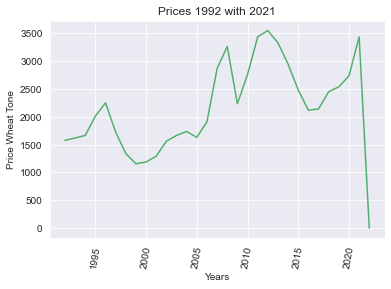

In [6]:
df_year_wheat = df.groupby(["year"])['price_wheat_ton'].sum().reset_index()
showlineplot("darkgrid", "year", "price_wheat_ton", df_year_wheat, 0.7, 80,"#129632", 'Years', "Price Wheat Tone",
             "Prices 1992 with 2021")

<a id='7'></a>
### Corn Annual Price Graph

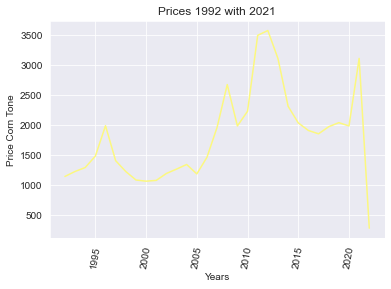

In [7]:
df_year_corn = df.groupby(["year"])["price_corn_ton"].sum().reset_index()
showlineplot("darkgrid", "year", "price_corn_ton", df_year_corn, 1, 80,"#fcf87f", "Years", "Price Corn Tone",
             "Prices 1992 with 2021")

<a id='8'></a>
### Rice Annual Price Graph

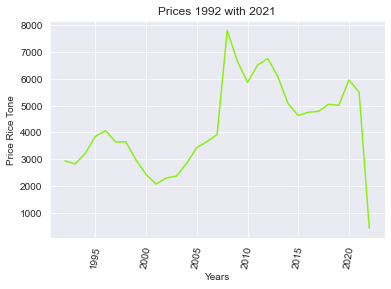

In [8]:
df_year_rice = df.groupby(["year"])["price_rice_ton"].sum().reset_index()
showlineplot("darkgrid", "year", "price_rice_ton", df_year_rice, 1, 80,"#88f113", "Years", "Price Rice Tone",
             "Prices 1992 with 2021")

In [9]:
df.isnull().sum()

year                    0
month                   0
price_wheat_ton         1
price_rice_ton          0
price_corn_ton          0
inflation_rate          1
price_wheat_ton_infl    1
price_rice_ton_infl     1
price_corn_ton_infl     1
dtype: int64

*We filled missing values with avarage values*

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.isnull().sum()

year                    0
month                   0
price_wheat_ton         0
price_rice_ton          0
price_corn_ton          0
inflation_rate          0
price_wheat_ton_infl    0
price_rice_ton_infl     0
price_corn_ton_infl     0
dtype: int64

In [12]:
df.describe()

,year,price_wheat_ton,price_rice_ton,price_corn_ton,inflation_rate,price_wheat_ton_infl,price_rice_ton_infl,price_corn_ton_infl
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2006.583333,185.302869,364.105611,155.502750,36.316685,241.726769,474.038384,201.211086
std,8.671906,64.894707,131.367591,62.611439,26.568297,65.143381,133.589696,61.641720
min,1992.000000,85.300000,163.750000,75.270000,-1.290000,136.220000,246.020000,116.280000
25%,1999.000000,137.367500,261.625000,104.192500,12.370000,193.060000,397.650000,159.432500
50%,2007.000000,175.450000,344.675000,149.745000,30.130000,228.690000,456.225000,186.025000
75%,2014.000000,220.210000,444.250000,176.652500,59.700000,275.507500,539.590000,220.840000
max,2022.000000,419.610000,907.000000,333.050000,89.590000,518.470000,1120.690000,385.910000


In [13]:
df.describe([0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
year,360.0,2006.583333,8.671906,1992.00,1993.0000,1999.0000,2007.000,2014.0000,2020.0000,2021.0000,2022.00
price_wheat_ton,360.0,185.302869,64.894707,85.30,99.2495,137.3675,175.450,220.2100,315.1655,344.4250,419.61
price_rice_ton,360.0,364.105611,131.367591,163.75,186.5000,261.6250,344.675,444.2500,574.7750,709.1825,907.00
price_corn_ton,360.0,155.502750,62.611439,75.27,89.1110,104.1925,149.745,176.6525,293.0180,321.0099,333.05
inflation_rate,360.0,36.316685,26.568297,-1.29,2.7900,12.3700,30.130,59.7000,84.1500,89.5900,89.59
price_wheat_ton_infl,360.0,241.726769,65.143381,136.22,154.7605,193.0600,228.690,275.5075,372.5110,421.8482,518.47
price_rice_ton_infl,360.0,474.038384,133.589696,246.02,279.6715,397.6500,456.225,539.5900,695.2490,876.2666,1120.69
price_corn_ton_infl,360.0,201.211086,61.641720,116.28,132.2665,159.4325,186.025,220.8400,343.7240,372.4086,385.91


<a id='9'></a>
### Outliers

In [14]:
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.25)
    quartile3 = dataframe[col_name].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [16]:
check_outlier(df, "price_wheat_ton")

True

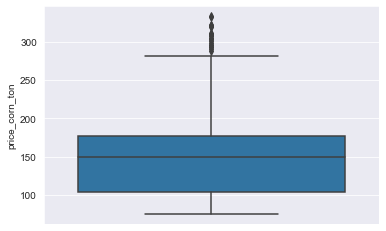

In [17]:
sns.boxplot(y=df.price_corn_ton);

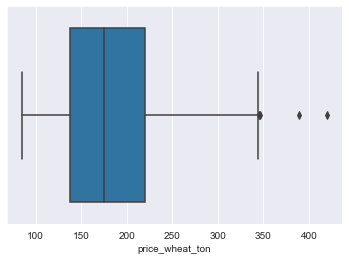

In [18]:
sns.boxplot(x=df.price_wheat_ton);

**We have used boxplot inorder to demonstrate specified column in our data,As you can see ,there are outliers in inside of our data**

In [19]:
low_limit, up_limit = outlier_thresholds(df, "price_wheat_ton")
print(low_limit, up_limit)

13.103750000000005 344.47375


*we describe a function which if column's value greater than up_limit,we have to equal to up_limit and if column's value smaller than low_limit,we have to equal to low_limit because of outliers effect data dispersion*

In [20]:
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit


<a id='10'></a>
#### Numeric variables


In [21]:
numeric_columns = [col for col in df.columns if df[col].dtypes != "O"]
print(numeric_columns)

['year', 'price_wheat_ton', 'price_rice_ton', 'price_corn_ton', 'inflation_rate', 'price_wheat_ton_infl', 'price_rice_ton_infl', 'price_corn_ton_infl']


<a id='11'></a>

#### Outlier analysis for numerical variables


In [22]:
for col in numeric_columns:
    replace_with_thresholds(df, col)


In [23]:
check_outlier(df, "price_wheat_ton")

False

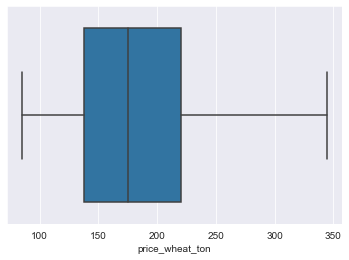

In [24]:
sns.boxplot(x=df.price_wheat_ton);

**We have checked value of price_wheat_ton both functionally and visually**

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,360.0,2006.583333,8.671906,1992.00,1999.0000,2007.000,2014.0000,2022.00000
price_wheat_ton,360.0,184.963244,63.887322,85.30,137.3675,175.450,220.2100,344.47375
price_rice_ton,360.0,362.925611,127.358410,163.75,261.6250,344.675,444.2500,718.18750
price_corn_ton,360.0,154.166208,59.422768,75.27,104.1925,149.745,176.6525,285.34250
inflation_rate,360.0,36.316685,26.568297,-1.29,12.3700,30.130,59.7000,89.59000
price_wheat_ton_infl,360.0,240.814262,62.343376,136.22,193.0600,228.690,275.5075,399.17875
price_rice_ton_infl,360.0,470.534134,122.161260,246.02,397.6500,456.225,539.5900,752.50000
price_corn_ton_infl,360.0,198.136100,54.401224,116.28,159.4325,186.025,220.8400,312.95125


<a id='12'></a>
### **Correlation Analysis**

In [26]:
df.corr(method="pearson")

,year,price_wheat_ton,price_rice_ton,price_corn_ton,inflation_rate,price_wheat_ton_infl,price_rice_ton_infl,price_corn_ton_infl
year,1.000000,0.620233,0.630094,0.622983,-0.980872,0.105569,0.135842,0.190673
price_wheat_ton,0.620233,1.000000,0.760506,0.899022,-0.637933,0.832783,0.548402,0.771617
price_rice_ton,0.630094,0.760506,1.000000,0.830012,-0.647477,0.540639,0.839275,0.685932
price_corn_ton,0.622983,0.899022,0.830012,1.000000,-0.634953,0.706443,0.625639,0.873273
inflation_rate,-0.980872,-0.637933,-0.647477,-0.634953,1.000000,-0.122455,-0.152802,-0.214781
price_wheat_ton_infl,0.105569,0.832783,0.540639,0.706443,-0.122455,1.000000,0.627939,0.851776
price_rice_ton_infl,0.135842,0.548402,0.839275,0.625639,-0.152802,0.627939,1.000000,0.741049
price_corn_ton_infl,0.190673,0.771617,0.685932,0.873273,-0.214781,0.851776,0.741049,1.000000


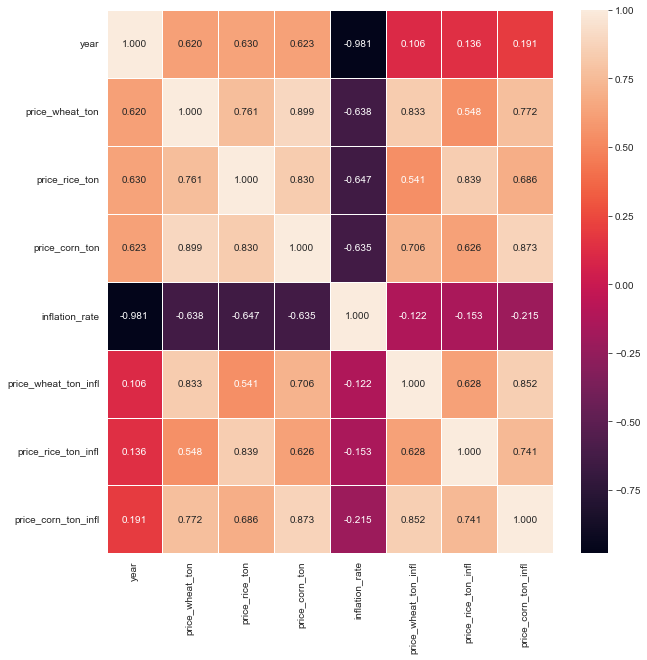

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".3f", linewidths=.5, cbar=True)
plt.show()

<a id='13'></a>
#### Data Summary

In [28]:
def grab_col_names(dataframe, cat_th=12, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("Observations: {}".format(dataframe.shape[0]))
    print("Variables: {}".format(dataframe.shape[1]))
    print("cat_cols: {}".format(len(cat_cols)))
    print("num_cols {}".format(len(num_cols)))
    print("cut_but_car {}".format(len(cat_but_car)))
    print("num_but_cat {}".format(len(num_but_cat)))
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [29]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
cat_cols

Observations: 360
Variables: 9
cat_cols: 1
num_cols 8
cut_but_car 0
num_but_cat 0


['month']

<a id='14'></a>
## Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [31]:
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

###### **OneHot Encoding**

In [32]:
ohe_cols = [col for col in df.columns if 12 >= df[col].nunique() > 2]
ohe_cols

['month']

In [33]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)
df.year = df.year.astype("int64")
df.head(10)

,year,price_wheat_ton,price_rice_ton,price_corn_ton,inflation_rate,price_wheat_ton_infl,price_rice_ton_infl,price_corn_ton_infl,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1992,170.12,278.25,113.62,89.59,322.53,527.53,215.41,0,0,1,0,0,0,0,0,0,0,0
1,1992,161.44,277.20,117.00,89.59,306.07,525.54,221.82,0,0,0,0,0,0,1,0,0,0,0
2,1992,153.07,278.00,108.52,89.59,290.21,527.06,205.74,0,0,0,0,0,0,0,0,0,0,0
3,1992,139.72,274.00,109.64,89.59,264.90,519.48,207.87,0,0,0,0,0,0,0,1,0,0,0
4,1992,140.36,268.80,110.90,89.59,266.11,509.62,210.26,0,0,0,0,0,1,0,0,0,0,0
5,1992,129.93,278.50,102.75,89.59,246.33,528.01,194.80,0,0,0,0,1,0,0,0,0,0,0
6,1992,118.80,270.80,96.96,89.59,225.23,513.41,183.83,1,0,0,0,0,0,0,0,0,0,0
7,1992,131.47,257.00,98.05,89.59,249.25,487.25,185.89,0,0,0,0,0,0,0,0,0,0,1
8,1992,137.42,250.00,95.11,89.59,260.53,473.98,180.32,0,0,0,0,0,0,0,0,0,1,0
9,1992,145.84,252.60,94.48,89.59,276.50,478.90,179.12,0,0,0,0,0,0,0,0,1,0,0


<a id='15'></a>
#### Standardization

In [34]:
from sklearn.preprocessing import MinMaxScaler

for col in num_cols:
    transformer = MinMaxScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

<a id='16'></a>
### Prediction without feature engineering

In [35]:
from sklearn.linear_model import LinearRegression

y = df.price_wheat_ton
X = df.drop(["price_wheat_ton"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [36]:
def train_model(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return model, y_pred

In [37]:
LinReg, y_pred = train_model(LinearRegression(), X_train, y_train, X_test)

In [38]:
LinReg.score(X_test, y_test)

0.984368017788525

In [39]:
def show_description(y_test, y_pred):
    print("Test RMSE:", "{:.5f}".format(np.sqrt(mean_squared_error(y_test, y_pred))), "\n")
    print("Test MAE:", "{:.5f}".format(mean_absolute_error(y_test, y_pred)), "\n")
    print("Test R^2:", "{:.5f}".format(r2_score(y_test, y_pred)))


In [40]:
show_description(y_test, y_pred)

Test RMSE: 0.02981 

Test MAE: 0.02195 

Test R^2: 0.98437


<a id='17'></a>
### Prediction with feature engineering

In [41]:
df = cereal_df.copy()
df.drop_duplicates()
df.fillna(df.mean(), inplace=True)
df.columns = df.columns.str.lower()
low_limit, up_limit = outlier_thresholds(df, "price_wheat_ton")
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

for col in num_cols:
    replace_with_thresholds(df, col)

check_outlier(df, "price_wheat_ton")

False

In [42]:
categories = ["Very Bad", "Bad", "Avarage", "Good", "Very Good"]

In [43]:
def create_array(start, finish, type, divide_count):
    array = np.linspace(start, finish, divide_count).astype(type)
    return array

In [44]:
def categorized_data(df, column, new_column_name, divide_array, new_column_name_values):
    start, finish, type, divide_count = divide_array[0], divide_array[1], divide_array[2], len(new_column_name_values)
    values = create_array(start, finish, type, divide_count)
    df.loc[(df[column] <= values[0]), new_column_name] = new_column_name_values[0]
    for i in range(len(new_column_name_values)):
        df.loc[(df[column] >= values[i]), new_column_name] = new_column_name_values[i]


### *categorized_data_qcut func*
* q : Seperation counts
* labels : Divide labels (For example :A,B,C,D,E)

In [45]:
def categorized_data_qcut(df, column, new_column_name, statements):
    df[new_column_name] = pd.qcut(df[column], q=len(statements), labels=statements)

In [46]:
states_percent = [df.price_wheat_ton.min(), df.price_wheat_ton.max(), "int64"]
categorized_data(df, "price_wheat_ton", "price_wheat_ton_status", states_percent, categories)
df.year = df.year.astype("int64")
df.price_wheat_ton_status.value_counts()

Very Bad     131
Bad          130
Avarage       68
Good          27
Very Good      4
Name: price_wheat_ton_status, dtype: int64

As you can see ,when we haven't used qcut func , datas  didn't disperse numerically  at the specified range

In [47]:
df.price_wheat_ton_status.value_counts()

Very Bad     131
Bad          130
Avarage       68
Good          27
Very Good      4
Name: price_wheat_ton_status, dtype: int64

*Apparently, qcut func tried to divide up the underlying data into equal sized bins.*

In [48]:
categorized_data_qcut(df, "price_wheat_ton", "price_wheat_ton_status", categories)
df.price_wheat_ton_status.value_counts()

Very Bad     72
Bad          72
Avarage      72
Good         72
Very Good    72
Name: price_wheat_ton_status, dtype: int64

Let's see  counts of columns,observations,variables

In [49]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 360
Variables: 10
cat_cols: 2
num_cols 8
cut_but_car 0
num_but_cat 1


In [50]:
num_but_cat

['price_wheat_ton_status']

In [51]:
num_cols

['year',
 'price_wheat_ton',
 'price_rice_ton',
 'price_corn_ton',
 'inflation_rate',
 'price_wheat_ton_infl',
 'price_rice_ton_infl',
 'price_corn_ton_infl']

In [52]:
cat_but_car

[]

In [53]:
cat_cols

['month', 'price_wheat_ton_status']

In [54]:
df.head(10)

,year,month,price_wheat_ton,price_rice_ton,price_corn_ton,inflation_rate,price_wheat_ton_infl,price_rice_ton_infl,price_corn_ton_infl,price_wheat_ton_status
0,1992,Feb,170.12,278.25,113.62,89.59,322.53,527.53,215.41,Avarage
1,1992,Mar,161.44,277.20,117.00,89.59,306.07,525.54,221.82,Avarage
2,1992,Apr,153.07,278.00,108.52,89.59,290.21,527.06,205.74,Bad
3,1992,May,139.72,274.00,109.64,89.59,264.90,519.48,207.87,Bad
4,1992,Jun,140.36,268.80,110.90,89.59,266.11,509.62,210.26,Bad
5,1992,Jul,129.93,278.50,102.75,89.59,246.33,528.01,194.80,Bad
6,1992,Aug,118.80,270.80,96.96,89.59,225.23,513.41,183.83,Very Bad
7,1992,Sep,131.47,257.00,98.05,89.59,249.25,487.25,185.89,Bad
8,1992,Oct,137.42,250.00,95.11,89.59,260.53,473.98,180.32,Bad
9,1992,Nov,145.84,252.60,94.48,89.59,276.50,478.90,179.12,Bad


In [55]:
ohe_cols = [col for col in df.columns if 12 >= df[col].nunique() > 2]
ohe_cols

['month', 'price_wheat_ton_status']

In [56]:
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)
df.year = df.year.astype("int64")
df.head(10)

,year,price_wheat_ton,price_rice_ton,price_corn_ton,inflation_rate,price_wheat_ton_infl,price_rice_ton_infl,price_corn_ton_infl,month_Aug,month_Dec,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,price_wheat_ton_status_Bad,price_wheat_ton_status_Avarage,price_wheat_ton_status_Good,price_wheat_ton_status_Very Good
0,1992,170.12,278.25,113.62,89.59,322.53,527.53,215.41,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1992,161.44,277.20,117.00,89.59,306.07,525.54,221.82,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1992,153.07,278.00,108.52,89.59,290.21,527.06,205.74,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1992,139.72,274.00,109.64,89.59,264.90,519.48,207.87,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1992,140.36,268.80,110.90,89.59,266.11,509.62,210.26,0,0,...,1,0,0,0,0,0,1,0,0,0
5,1992,129.93,278.50,102.75,89.59,246.33,528.01,194.80,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1992,118.80,270.80,96.96,89.59,225.23,513.41,183.83,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1992,131.47,257.00,98.05,89.59,249.25,487.25,185.89,0,0,...,0,0,0,0,0,1,1,0,0,0
8,1992,137.42,250.00,95.11,89.59,260.53,473.98,180.32,0,0,...,0,0,0,0,1,0,1,0,0,0
9,1992,145.84,252.60,94.48,89.59,276.50,478.90,179.12,0,0,...,0,0,0,1,0,0,1,0,0,0


In [57]:
from sklearn.linear_model import LinearRegression

y = df.price_wheat_ton
X = df.drop(["price_wheat_ton"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [58]:
def train_model(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return model, y_pred

In [59]:
LinReg, y_pred = train_model(LinearRegression(), X_train, y_train, X_test)

<a id='18'></a>
### Result

In [60]:
LinReg.score(X_test, y_test)

0.9916647960004427

In [61]:
show_description(y_test, y_pred)

Test RMSE: 5.64069 

Test MAE: 3.93856 

Test R^2: 0.99166


**Essentially,result hasn't change so much according to previous result but we have obtained better result.**